<h1 style="color:green; text-align:center; font-size:45px;">Collaboration-Based-Filtering</h1>


<h2 style="color:cyan;"> Code Summary </h2>

This code imports essential libraries for processing and analyzing data:

1. **`pandas`:**
   - Provides data manipulation and analysis tools, such as DataFrames for structured data handling.

2. **`numpy`:**
   - Offers support for numerical computations and handling of arrays.

3. **`cosine_similarity` from `sklearn.metrics.pairwise`:**
   - Computes the cosine similarity, which measures the similarity between vectors (e.g., user preferences and movie genres).

These libraries are commonly used for implementing recommendation systems and machine learnig workflows.


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

<h2 style="color:cyan;"> Code Summary </h2>

1. **Load Ratings Data:**
   - The code reads a CSV file (`ratings_cleaned.csv`) containing cleaned ratings data into a Pandas DataFrame called `ratings`.

2. **Display Data:**
   - The `head()` method is used to print the first five rows of the `ratings` DataFrame to inspect its structure and content.

### Expected Output:
The first five rows of the `ratings_cleaned.csv` file will display, showing columns like:
- `user_id`: The ID of the user who rated the movie.
- `movie_id`: The ID of the movie that was rated.
- `rating`: The rating given by the user t the movie.


In [2]:
ratings = pd.read_csv('../cleaned_data/ratings_cleaned.csv')
print(ratings.head())

   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596


<h2 style="color:cyan;"> Code Summary </h2>

1. **Load Movies Data:**
   - Reads the `u.item` file, a pipe-separated (`|`) dataset, into a Pandas DataFrame called `movies`.
   - Specifies the encoding as `latin-1` to handle special characters.
   - Assigns column names explicitly for the file's structure.
   - Selects only the `movie_id` and `title` columns using the `usecols` parameter to reduce unnecessary data.

2. **Display Data:**
   - The `head()` method prints the first five rows of the `movies` DataFrame to inspect the `movie_id` and `title` columns.

### Expected Output:
The first five rows of the `movies` DataFrame will display, showing:
- `movie_id`: The unique identifier for each movie.
- `title`: The title of the movie.

This provides a quick overview of the movie dataset's structre and content.


In [3]:
movies = pd.read_csv('../data/u.item', sep='|', encoding='latin-1', names=[
    'movie_id', 'title', 'release_date', 'video_release_date', 
    'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 
    'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
    'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
    'Thriller', 'War', 'Western'], usecols=['movie_id', 'title'])
print(movies.head())

   movie_id              title
0         1   Toy Story (1995)
1         2   GoldenEye (1995)
2         3  Four Rooms (1995)
3         4  Get Shorty (1995)
4         5     Copycat (1995)


<h2 style="color:cyan;"> Code Summary </h2>

1. **Create User-Item Matrix:**
   - A pivot table is created from the `ratings` DataFrame using:
     - `index='user_id'`: Rows represent users.
     - `columns='movie_id'`: Columns represent movies.
     - `values='rating'`: Cells contain the rating given by the user to the movie.

2. **Handle Missing Values:**
   - Missing values (`NaN`) in the matrix are replaced with `0` using `fillna(0)`. This indicates that the user has not rated those movies.

3. **Display Data:**
   - The `head()` method displays the first five rows of the `user_item_matrix` to provide a preview of the matrix structure.

### Expected Output:
A matrix where:
- **Rows (`user_id`)**: Each row corresponds to a unique user.
- **Columns (`movie_id`)**: Each column corresponds to a unique movie.
- **Values**: The ratings given by users to movies (or `0` for unrated movies).

This matrix is essential for implementing collaborative filtering-based recmmendation systems.


In [4]:
user_item_matrix = ratings.pivot_table(index='user_id', columns='movie_id', values='rating')
user_item_matrix = user_item_matrix.fillna(0)  # Fill missing ratings with 0
print(user_item_matrix.head())

movie_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                               ...   
1          5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2          4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   
3          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5          4.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

movie_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                               
1          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5          0.0   0.0   0.0   0.0  

<h2 style="color:cyan;"> Code Summary </h2>

1. **Compute User Similarity:**
   - Calculates pairwise cosine similarity between users based on their ratings in the `user_item_matrix`.
   - This results in a similarity matrix where each entry represents the similarity between two users.

2. **Convert to DataFrame:**
   - Converts the similarity matrix into a Pandas DataFrame (`user_similarity_df`) for easier inspection and manipulation:
     - **Rows (`index`)**: Represent `user_id` (user being compared).
     - **Columns**: Represent `user_id` (user being compared to).

3. **Display Data:**
   - The `head()` method prints the first five rows of the `user_similarity_df` to inspect user-to-user similarity values.

### Expected Output:
A square matrix where:
- Rows and columns represent `user_id`s.
- Values range between `0` and `1`, where:
  - `1`: Perfect similarity.
  - `0`: No similarity.

This matrix is used for **user-based collaborative filtering**, identifying similar users to ake recommendations.


In [5]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
print(user_similarity_df.head())

user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.166931  0.047460  0.064358  0.378475  0.430239  0.440367   
2        0.166931  1.000000  0.110591  0.178121  0.072979  0.245843  0.107328   
3        0.047460  0.110591  1.000000  0.344151  0.021245  0.072415  0.066137   
4        0.064358  0.178121  0.344151  1.000000  0.031804  0.068044  0.091230   
5        0.378475  0.072979  0.021245  0.031804  1.000000  0.237286  0.373600   

user_id       8         9         10   ...       934       935       936  \
user_id                                ...                                 
1        0.319072  0.078138  0.376544  ...  0.369527  0.119482  0.274876   
2        0.103344  0.161048  0.159862  ...  0.156986  0.307942  0.358789   
3        0.083060  0.061040  0.065151  ...  0.031875  0.042753  0.163829   
4        0.188060  0.101284  0.060859  ...  0.052107

<h2 style="color:cyan;"> Code Summary </h2>

This code defines a function `predict_ratings` to predict a user's ratings for all movies based on user-based collaborative filtering.

## Function Steps:
1. **Input Parameters:**
   - `user_id`: The ID of the user for whom ratings are to be predicted.
   - `user_similarity_df`: A DataFrame containing cosine similarity scores between users.
   - `user_item_matrix`: A matrix of user ratings for movies.

2. **User Similarities and Ratings:**
   - Retrieves the similarity scores of all users to the given `user_id` (`user_similarity_df[user_id]`).
   - Retrieves the given user's existing ratings from `user_item_matrix`.

3. **Weighted Sum of Ratings:**
   - Computes the weighted sum of ratings by multiplying the similarity scores with other users' ratings:
     - `user_item_matrix.T.dot(user_similarities)`: Multiplies user ratings matrix (transposed) with similarity scores.
   - Calculates the sum of similarity scores (`sum_of_weights`).

4. **Predicted Ratings:**
   - Divides the weighted sum of ratings by the sum of similarity scores:
     - `predictions = weighted_ratings / sum_of_weights`.
   - Avoids division by zero by using `(sum_of_weights if sum_of_weights != 0 else 1)`.

5. **Return:**
   - Returns the predicted ratings for all movies as a Pandas Series or DataFrame.

### Usage:
This function is typically used to:
- Predict ratings for a user for movies they have not rated.
- Recommend movies with the highest predicted ratings.

### Output:
A vector of predicted ratings for all movies for the specified `user_id`.

In [6]:
def predict_ratings(user_id, user_similarity_df, user_item_matrix):
    user_similarities = user_similarity_df[user_id]
    user_ratings = user_item_matrix.loc[user_id]
    
    # Weighted sum of ratings
    weighted_ratings = user_item_matrix.T.dot(user_similarities)
    sum_of_weights = np.abs(user_similarity_df[user_id]).sum()
    
    predictions = weighted_ratings / (sum_of_weights if sum_of_weights != 0 else 1)
    return predictions

<h2 style="color:cyan;"> Code Summary </h2>

This code defines a function `recommend_movies` to generate **collaborative filtering-based recommendations** for a random user and save the results.

## Key Steps:
1. **Parameters:**
   - `user_item_matrix`: User-item interaction matrix containing user ratings for movies.
   - `user_similarity_df`: User similarity matrix based on cosine similarity.
   - `movies`: DataFrame containing movie details (`movie_id` and `title`).
   - `output_folder`: Path to save recommendations (default: `../Final Output`).

2. **Ensure Output Directory:**
   - Checks if the specified output folder exists. If not, it creates the folder.

3. **Random User Selection:**
   - Selects a random `user_id` from the `user_item_matrix`.

4. **Generate Predictions:**
   - Calls `predict_ratings` to compute predicted ratings for the random user.

5. **Top Movie Recommendations:**
   - Sorts the predicted ratings in descending order.
   - Selects the top 10 movies based on the highest predicted ratings.
   - Matches these movies with their `movie_id` and `title` in the `movies` DataFrame.

6. **Save Recommendations:**
   - Saves the top 10 recommended movies to a CSV file (`Collaborative_Based_Random_User_{user_id}_Recommendations.csv`) in the specified output folder.
   - Displays the saved file path and the top recommendations in the console.

7. **Return Value:**
   - Returns a DataFrame containing the `movie_id` and `title` of the top 10 recommended movies.

## Example Usage:
- Call `recommend_movies(user_item_matrix, user_similarity_df, movies)` to generate recommendations for a random user.

### Output:
- Saves a CSV file with the top 10 movie recommendations for the selected random user.
- Prints the recommendations and file location to the console.
- Returns  DataFrame of the recommended movies.


In [7]:
import os
import random
import pandas as pd

def recommend_movies(user_item_matrix, user_similarity_df, movies, output_folder="../Final Output"):
    """
    Generate recommendations for a random user based on collaborative filtering.

    Parameters:
    - user_item_matrix (pd.DataFrame): User-Item interaction matrix.
    - user_similarity_df (pd.DataFrame): User similarity matrix.
    - movies (pd.DataFrame): DataFrame containing movie details (movie_id, title).
    - output_folder (str): Path to save the recommendations file. Default is "../Final Output".

    Returns:
    - pd.DataFrame: Top 10 recommended movies for the random user.
    """
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a random user ID from the dataset
    random_user_id = random.choice(user_item_matrix.index)

    # Generate predictions for the random user
    predicted_ratings = predict_ratings(random_user_id, user_similarity_df, user_item_matrix)

    # Get the top 10 recommended movies
    top_movie_ids = predicted_ratings.sort_values(ascending=False).index[:10]
    recommended_movies = movies[movies['movie_id'].isin(top_movie_ids)]

    # Save the recommendations for the random user
    output_file = os.path.join(output_folder, f"Collaborative_Based_Random_User_{random_user_id}_Recommendations.csv")
    recommended_movies[['movie_id', 'title']].to_csv(output_file, index=False)
    
    # Display results
    print(f"Recommendations saved to: {output_file}")
    print(f"Top Recommendations for Random User {random_user_id}:\n", recommended_movies[['movie_id', 'title']])

    # Return the recommendations as a DataFrame
    return recommended_movies[['movie_id', 'title']]

<h2 style="color:cyan;"> Code Summary </h2>

1. **Call the `recommend_movies` Function:**
   - The function `recommend_movies` is called with the following inputs:
     - `user_item_matrix`: Matrix of user ratings for movies.
     - `user_similarity_df`: User similarity matrix based on cosine similarity.
     - `movies`: DataFrame containing movie details (`movie_id` and `title`).

2. **Generate Recommendations:**
   - A random user is selected.
   - The function computes predicted ratings for all movies for the random user.
   - Extracts the top 10 recommended movies for the user.
   - Saves the recommendations to a CSV file in the specified output folder.

3. **Display Recommendations:**
   - The top 10 recommended movies for the random user are stored in `random_recommendations`.
   - The recommendations are printed/displayed as a Pandas DataFrame.

### Expected Output:
- A DataFrame containing the top 10 recommended movies, including:
  - `movie_id`: Unique identifier for each movie.
  - `title`: The title of the recommended movie.

This output provides a quick view of the recommendations for the andomly selected user.


In [8]:
# Call the function and display recommendations for a random user
random_recommendations = recommend_movies(user_item_matrix, user_similarity_df, movies)

# Display the recommendations
random_recommendations

Recommendations saved to: ../Final Output\Collaborative_Based_Random_User_471_Recommendations.csv
Top Recommendations for Random User 471:
      movie_id                                      title
0           1                           Toy Story (1995)
49         50                           Star Wars (1977)
97         98           Silence of the Lambs, The (1991)
99        100                               Fargo (1996)
171       172            Empire Strikes Back, The (1980)
172       173                 Princess Bride, The (1987)
173       174             Raiders of the Lost Ark (1981)
180       181                  Return of the Jedi (1983)
203       204                  Back to the Future (1985)
209       210  Indiana Jones and the Last Crusade (1989)


,movie_id,title
0,1,Toy Story (1995)
49,50,Star Wars (1977)
97,98,"Silence of the Lambs, The (1991)"
99,100,Fargo (1996)
171,172,"Empire Strikes Back, The (1980)"
172,173,"Princess Bride, The (1987)"
173,174,Raiders of the Lost Ark (1981)
180,181,Return of the Jedi (1983)
203,204,Back to the Future (1985)
209,210,Indiana Jones and the Last Crusade (1989)


<h2 style="color:cyan;"> Code Summary </h2>

This code generates and displays movie recommendations for **5 random users** using collaborative filtering.

## Key Steps:
1. **Loop Through 5 Random Users:**
   - A loop runs 5 times to select a random user (`random_user_id`) from the `user_item_matrix`.

2. **Predict Ratings:**
   - For each selected user, the `predict_ratings` function computes predicted ratings for all movies.

3. **Get Top 10 Recommendations:**
   - The movies are sorted by predicted ratings in descending order.
   - The top 10 movies are selected based on the highest predicted ratings.

4. **Match Movie Details:**
   - The top movie IDs are matched with the corresponding `movie_id` and `title` in the `movies` DataFrame.

5. **Display Recommendations:**
   - The top 10 recommendations for each random user are printed, including:
     - `movie_id`: The unique identifier for each movie.
     - `title`: The title of the movie.

### Expected Output:
For each of the 5 random users:
- A list of the top 10 recommended movies (as a DataFrame) is displayed, showing:
  - `movie_id`: Unique ID of the movie.
  - `title`: Titl of the recommended movie.


In [9]:
# Generate recommendations for 5 random users
for _ in range(5):
    random_user_id = random.choice(user_item_matrix.index)
    predicted_ratings = predict_ratings(random_user_id, user_similarity_df, user_item_matrix)
    top_movie_ids = predicted_ratings.sort_values(ascending=False).index[:10]
    recommended_movies = movies[movies['movie_id'].isin(top_movie_ids)]
    
    print("\nTop Recommendations for Random User", random_user_id)
    print(recommended_movies[['movie_id', 'title']])


Top Recommendations for Random User 663
     movie_id                             title
0           1                  Toy Story (1995)
49         50                  Star Wars (1977)
55         56               Pulp Fiction (1994)
97         98  Silence of the Lambs, The (1991)
99        100                      Fargo (1996)
126       127             Godfather, The (1972)
173       174    Raiders of the Lost Ark (1981)
180       181         Return of the Jedi (1983)
257       258                    Contact (1997)
287       288                     Scream (1996)

Top Recommendations for Random User 250
     movie_id                             title
0           1                  Toy Story (1995)
49         50                  Star Wars (1977)
55         56               Pulp Fiction (1994)
97         98  Silence of the Lambs, The (1991)
99        100                      Fargo (1996)
126       127             Godfather, The (1972)
171       172   Empire Strikes Back, The (1980)
173   

<h2 style="color:cyan;"> Code Summary </h2>

This code visualizes the **distribution of ratings per user** using a histogram. 
It calculates the number of ratings each user has given (`user_ratings_count`) and plots it with 30 bins. 
The histogram shows the **x-axis** as the number of ratings and the **y-axis** as the count of users, 
providing insights into user activity in the dataset.

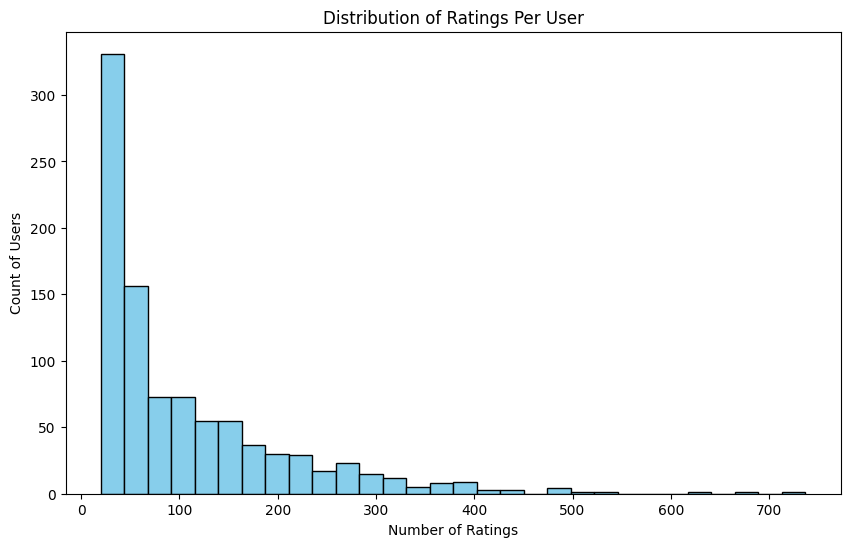

In [10]:
import matplotlib.pyplot as plt

# Calculate the number of ratings per user
user_ratings_count = ratings['user_id'].value_counts()

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Ratings Per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Users")
plt.show()

<h2 style="color:cyan;"> Code Summary </h2>

This code calculates and visualizes the **top 10 movies by average rating**.

1. **Calculate Average Ratings:**
   - Groups the `ratings` DataFrame by `movie_id` and computes the mean rating for each movie.
   - Sorts movies by average rating in descending order and selects the top 10.

2. **Map Movie Titles:**
   - Adds movie titles to the top-rated movies by mapping `movie_id` to `title` from the `movies` DataFrame.

3. **Plot Bar Chart:**
   - Creates a horizontal bar chart showing movie titles on the y-axis and their average ratings on the x-axis.
   - Customizes the chart with a title, axis labels, and inverted y-axis for readability.

### Output:
A bar chart displaying the **top 10 movies by average rating**, with movie titles and their respective verage ratings.


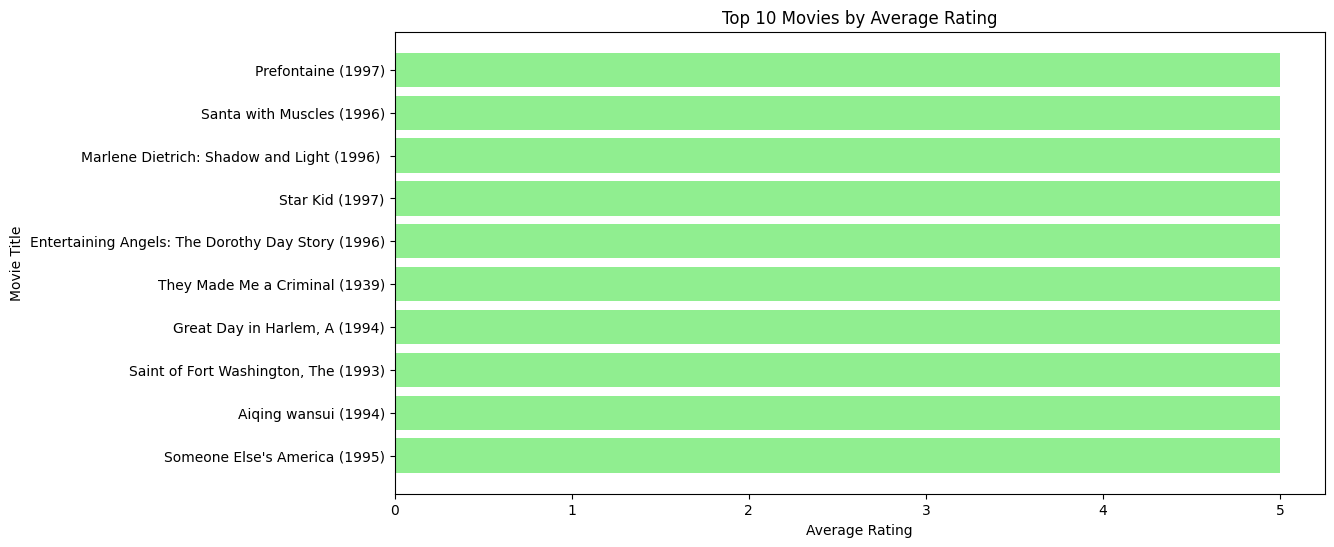

In [11]:
# Calculate average rating for each movie
average_ratings = ratings.groupby('movie_id')['rating'].mean().sort_values(ascending=False).head(10)

# Map movie titles
average_ratings = average_ratings.reset_index()
average_ratings['title'] = average_ratings['movie_id'].map(movies.set_index('movie_id')['title'])

# Plot top movies by average rating
plt.figure(figsize=(12, 6))
plt.barh(average_ratings['title'], average_ratings['rating'], color='lightgreen')
plt.title("Top 10 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.gca().invert_yaxis()
plt.show()

<h2 style="color:cyan;"> Code Summary </h2>

This code evaluates and visualizes **Precision@K** and **Recall@K** for predicted movie ratings compared to true ratings.

1. **Define `precision_recall_at_k` Function:**
   - Calculates precision and recall for the top-K recommended movies:
     - **Precision**: Proportion of recommended movies in the top K that are relevant.
     - **Recall**: Proportion of relevant movies in the top K that are recommended.

2. **Evaluate Precision and Recall:**
   - Loops through different values of `K` (e.g., 1, 5, 10, 20).
   - Computes Precision@K and Recall@K for each value of `K` and stores the scores.

3. **Plot Results:**
   - Plots Precision@K and Recall@K as line charts, with `K` on the x-axis and scores on the y-axis.
   - Adds labels, a title, a legend, and gridlines for clarity.

### Output:
- A plot showing how **precision** and **recall** vary with different values of `K`, providing insights into the effectiveness of the recommendation system at vrious thresholds.


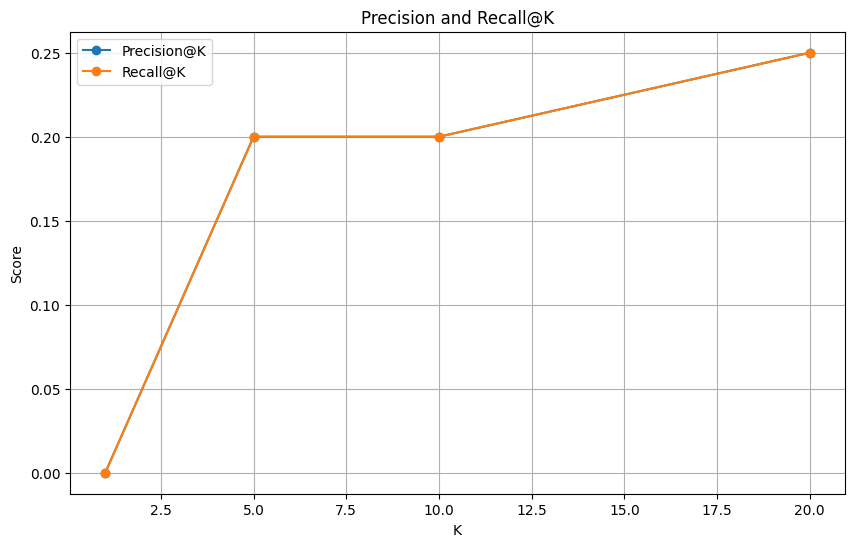

In [12]:
from sklearn.metrics import precision_score, recall_score

def precision_recall_at_k(predicted_ratings, true_ratings, k):
    # Get top K predicted movie IDs
    top_k_predicted = predicted_ratings.sort_values(ascending=False).index[:k]
    
    # Get actual top K movie IDs based on true ratings
    true_top_k = true_ratings.sort_values(ascending=False).index[:k]
    
    # Calculate precision and recall
    precision = len(set(top_k_predicted) & set(true_top_k)) / len(top_k_predicted)
    recall = len(set(top_k_predicted) & set(true_top_k)) / len(true_top_k)
    return precision, recall

# Evaluate Precision@K and Recall@K for different values of K
k_values = [1, 5, 10, 20]
precision_scores = []
recall_scores = []

for k in k_values:
    precision, recall = precision_recall_at_k(predicted_ratings, user_item_matrix.loc[random_user_id], k)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plot Precision and Recall@K
plt.figure(figsize=(10, 6))
plt.plot(k_values, precision_scores, label='Precision@K', marker='o')
plt.plot(k_values, recall_scores, label='Recall@K', marker='o')
plt.title("Precision and Recall@K")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

<h2 style="color:cyan;"> Code Summary </h2>

This code visualizes a **heatmap of user similarity scores** for a subset of users.

1. **Subset the Similarity Matrix:**
   - Extracts a sample (first 20 users) from the `user_similarity_df` for better visualization.

2. **Create Heatmap:**
   - Uses Seaborn's `heatmap` function to display the similarity scores between sampled users:
     - **`cmap='coolwarm'`**: Applies a color gradient to represent similarity values.
     - **`annot=False`**: Disables annotations of values in the heatmap for clarity.

3. **Customize and Display:**
   - Adds a title, x-axis, and y-axis labels for context.
   - Displays the heatmap using `plt.show()`.

### Output:
A heatmap where:
- **Axes**: Represent user IDs.
- **Colors**: Indicate similarity scores (e.g., red for high similarity, blue for low similarity).

This visualization highlights the pairwise similarities betwen a subset of users.


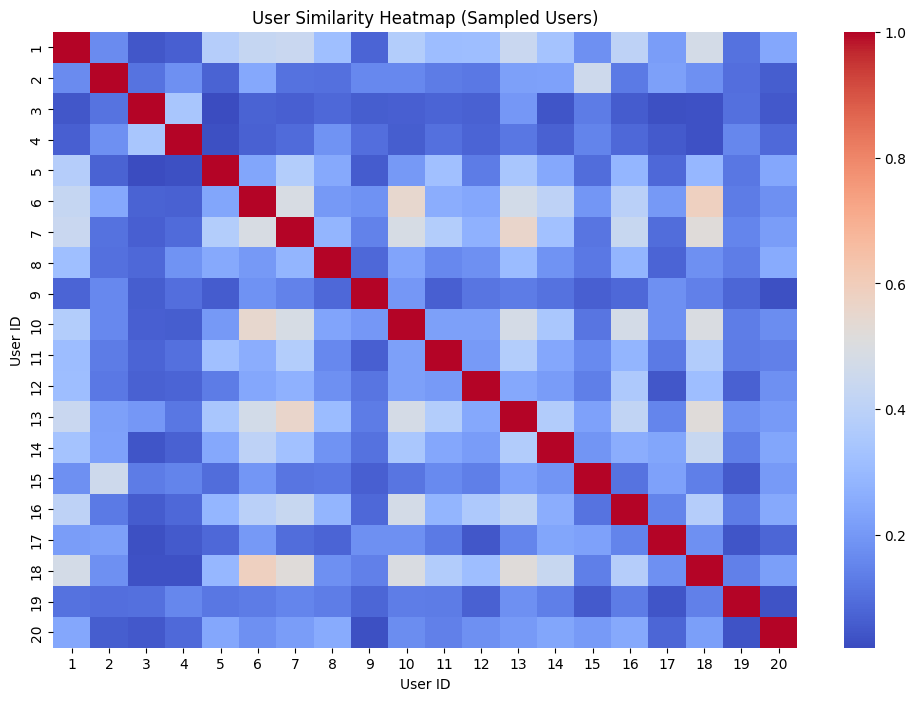

In [13]:
import seaborn as sns

# Sample a subset of the user similarity matrix for better visualization
subset_similarity = user_similarity_df.iloc[:20, :20]

plt.figure(figsize=(12, 8))
sns.heatmap(subset_similarity, cmap='coolwarm', annot=False)
plt.title("User Similarity Heatmap (Sampled Users)")
plt.xlabel("User ID")
plt.ylabel("User ID")
plt.show()

<h2 style="color:cyan;"> Code Summary </h2>

This code visualizes the **distribution of predicted ratings** for a random user using a histogram.

1. **Plot Histogram:**
   - Creates a histogram of the `predicted_ratings` for the selected `random_user_id`.
   - Divides the range of predicted ratings into 30 bins for better granularity.
   - Sets bar color to orange with black edges for clear visualization.

2. **Customize Plot:**
   - Adds a title: `"Predicted Ratings Distribution for User {random_user_id}"`.
   - Labels the x-axis as "Predicted Rating" and the y-axis as "Frequency."

3. **Display Plot:**
   - Uses `plt.show()` to render and display the histogram.

### Output:
A histogram where:
- **X-axis**: Represents the predicted rating values.
- **Y-axis**: Represents the frequency of those
predicted ratings.

This visualization helps analyze th- spread of predicted atings for the user.


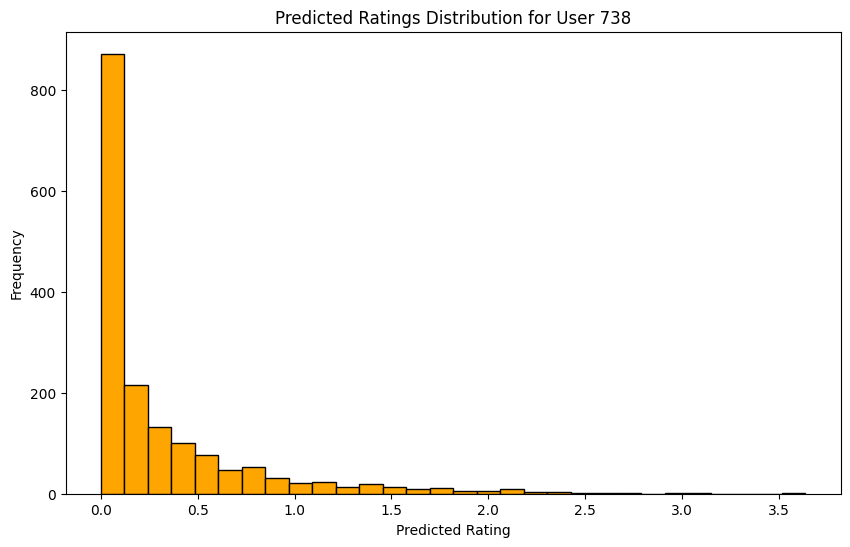

In [14]:
# Plot predicted ratings for a random user
plt.figure(figsize=(10, 6))
plt.hist(predicted_ratings, bins=30, color='orange', edgecolor='black')
plt.title(f"Predicted Ratings Distribution for User {random_user_id}")
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.show()